<a href="https://colab.research.google.com/github/SergSAS/R7/blob/master/TensorflowTTS_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorflowTTS real time E2E-TTS demonstration

This notebook provides a demonstration of the realtime E2E-TTS using TensorflowTTS

- Github: https://github.com/TensorSpeech/TensorflowTTS
- Audio samples: https://tensorspeech.github.io/TensorflowTTS/
- Korean Colab: https://colab.research.google.com/drive/1ybWwOS5tipgPFttNulp77P6DAB5MtiuN?usp=sharing

## Install

In [ ]:
import os
!git clone https://github.com/TensorSpeech/TensorFlowTTS
os.chdir("TensorFlowTTS")
!pip install  .
os.chdir("..")
import sys
sys.path.append("TensorFlowTTS/")

Cloning into 'TensorFlowTTS'...
remote: Enumerating objects: 10679, done.
remote: Total 10679 (delta 0), reused 0 (delta 0), pack-reused 10679
Receiving objects: 100% (10679/10679), 133.52 MiB | 28.86 MiB/s, done.
Resolving deltas: 100% (5163/5163), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/TensorFlowTTS
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.7/489.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 KB 22.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install git+https://github.com/repodiac/german_transliterate.git#egg=german_transliterate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/repodiac/german_transliterate.git to /tmp/pip-install-gahueq8m/german-transliterate_d84b1b7dc223473da8678bdf69873729
  Running command git clone --filter=blob:none --quiet https://github.com/repodiac/german_transliterate.git /tmp/pip-install-gahueq8m/german-transliterate_d84b1b7dc223473da8678bdf69873729
  Resolved https://github.com/repodiac/german_transliterate.git to commit 4e01beba5f19adb9ccd72d0607a81f4ed7f6ee87
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 KB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for german_transliterate: filename=german_transliterate-0.1.3-py3-none-any.whl size=20831 sha256=6599c31340071e08df994ceb8101dd47347049a08bb2867dad5f633c65769a2b
  Stored in directory: /tmp/pip-ephem-wheel-cache-hnvmm2c_/wheels/3b/71/44/41011f4e96d6128cce63f717f16415662a30

In [ ]:
!pip install h5py==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 KB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h5py: filename=h5py-2.10.0-cp39-cp39-linux_x86_64.whl size=5730350 sha256=2ea37b25938652b8c7f6bad879193af524a5c22dac1e0d054bfa34179f4ccf74
  Stored in directory: /root/.cache/pip/wheels/91/57/54/aa5901c840e89c1e931141d848b27421f68ad98bd285cc4036
Successfully built h5py
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires keras<2.12,>=2.11.0, but you have keras 2.7.0 which is incompatible.
tensorflow 2.11.0 requires tensorflow-estimator<2.12,>=2.11.0, but you hav

## Download pretrained feature generation model

You can select one from two models. Please only run the seletected model cells.


### (b) MelGAN + STFT Loss

In [ ]:
print("Downloading MelGAN-STFT model...")
!gdown --id {"1WB5iQbk9qB-Y-wO8BU6S2TnRiu4VU5ys"} -O melgan.stft-2M.h5
!gdown --id {"1OqdrcHJvtXwNasEZP7KXZwtGUDXMKNkg"} -O melgan.stft_config.yml

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1WB5iQbk9qB-Y-wO8BU6S2TnRiu4VU5ys
To: /content/melgan.stft-2M.h5
100% 17.1M/17.1M [00:00<00:00, 82.0MB/s]
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1OqdrcHJvtXwNasEZP7KXZwtGUDXMKNkg
To: /content/melgan.stft_config.yml
100% 1.77k/1.77k [00:00<00:00, 2.52MB/s]


## Load Model

In [ ]:
import tensorflow as tf

import yaml
import numpy as np
import matplotlib.pyplot as plt

import IPython.display as ipd

from tensorflow_tts.inference import TFAutoModel
from tensorflow_tts.inference import AutoConfig
from tensorflow_tts.inference import AutoProcessor

/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.7.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.


### (a) Tacotron 2

In [ ]:
tacotron2 = TFAutoModel.from_pretrained("tensorspeech/tts-tacotron2-ljspeech-en", name="tacotron2")

Downloading:   0%|          | 0.00/128M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

### (b) FastSpeech

In [ ]:
fastspeech = TFAutoModel.from_pretrained("tensorspeech/tts-fastspeech-ljspeech-en", name="fastspeech")

Downloading:   0%|          | 0.00/121M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.71k [00:00<?, ?B/s]

### (c) FastSpeech2

In [ ]:
fastspeech2 = TFAutoModel.from_pretrained("tensorspeech/tts-fastspeech2-ljspeech-en", name="fastspeech2")

Downloading:   0%|          | 0.00/125M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.71k [00:00<?, ?B/s]

### (d) MelGAN Original

In [ ]:
melgan = TFAutoModel.from_pretrained("tensorspeech/tts-melgan-ljspeech-en", name="melgan")

Downloading:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.68k [00:00<?, ?B/s]

### (e) MelGAN STFT

In [ ]:
melgan_stft_config = AutoConfig.from_pretrained('TensorFlowTTS/examples/melgan_stft/conf/melgan_stft.v1.yaml')
melgan_stft = TFAutoModel.from_pretrained(
    config=melgan_stft_config,
    pretrained_path="melgan.stft-2M.h5",
    name="melgan_stft"
)

### (f) Multi-band MelGAN

In [ ]:
mb_melgan = TFAutoModel.from_pretrained("tensorspeech/tts-mb_melgan-ljspeech-en", name="mb_melgan")

Downloading:   0%|          | 0.00/10.2M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.83k [00:00<?, ?B/s]

## Inference
- The first time model run inference will very slow cause by @tf.function.

In [ ]:
processor = AutoProcessor.from_pretrained("tensorspeech/tts-tacotron2-ljspeech-en")

Downloading:   0%|          | 0.00/3.57k [00:00<?, ?B/s]

In [ ]:
def do_synthesis(input_text, text2mel_model, vocoder_model, text2mel_name, vocoder_name):
  input_ids = processor.text_to_sequence(input_text)

  # text2mel part
  if text2mel_name == "TACOTRON":
    _, mel_outputs, stop_token_prediction, alignment_history = text2mel_model.inference(
        tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        tf.convert_to_tensor([len(input_ids)], tf.int32),
        tf.convert_to_tensor([0], dtype=tf.int32)
    )
  elif text2mel_name == "FASTSPEECH":
    mel_before, mel_outputs, duration_outputs = text2mel_model.inference(
        input_ids=tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        speaker_ids=tf.convert_to_tensor([0], dtype=tf.int32),
        speed_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
    )
  elif text2mel_name == "FASTSPEECH2":
    mel_before, mel_outputs, duration_outputs, _, _ = text2mel_model.inference(
        tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        speaker_ids=tf.convert_to_tensor([0], dtype=tf.int32),
        speed_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
        f0_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
        energy_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
    )
  else:
    raise ValueError("Only TACOTRON, FASTSPEECH, FASTSPEECH2 are supported on text2mel_name")

  # vocoder part
  if vocoder_name == "MELGAN" or vocoder_name == "MELGAN-STFT":
    audio = vocoder_model(mel_outputs)[0, :, 0]
  elif vocoder_name == "MB-MELGAN":
    audio = vocoder_model(mel_outputs)[0, :, 0]
  else:
    raise ValueError("Only MELGAN, MELGAN-STFT and MB_MELGAN are supported on vocoder_name")

  if text2mel_name == "TACOTRON":
    return mel_outputs.numpy(), alignment_history.numpy(), audio.numpy()
  else:
    return mel_outputs.numpy(), audio.numpy()

def visualize_attention(alignment_history):
  import matplotlib.pyplot as plt

  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111)
  ax.set_title(f'Alignment steps')
  im = ax.imshow(
      alignment_history,
      aspect='auto',
      origin='lower',
      interpolation='none')
  fig.colorbar(im, ax=ax)
  xlabel = 'Decoder timestep'
  plt.xlabel(xlabel)
  plt.ylabel('Encoder timestep')
  plt.tight_layout()
  plt.show()
  plt.close()

def visualize_mel_spectrogram(mels):
  mels = tf.reshape(mels, [-1, 80]).numpy()
  fig = plt.figure(figsize=(10, 8))
  ax1 = fig.add_subplot(311)
  ax1.set_title(f'Predicted Mel-after-Spectrogram')
  im = ax1.imshow(np.rot90(mels), aspect='auto', interpolation='none')
  fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
  plt.show()
  plt.close()

In [ ]:
#input_text = "Bill got in the habit of asking himself “Is that thought true?” And if he wasn’t absolutely certain it was, he just let it go."

In [ ]:
input_text = "Jennifer Clarke, James Marshall, William Fisher, Timo Roessner, Helga Weber, Brigitte Müller, Suman Sharma, Gita Singh, Vinod Sharma"

In [ ]:
# setup window for tacotron2 if you want to try
tacotron2.setup_window(win_front=10, win_back=10)

### (a) Tacotron2 + MELGAN

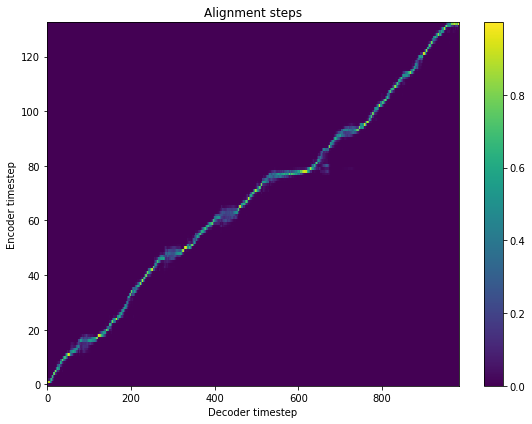

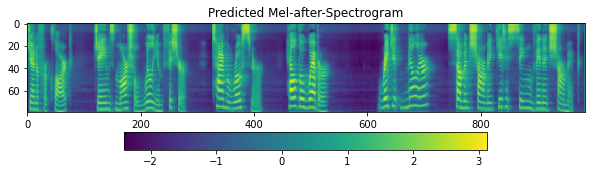

In [ ]:
mels, alignment_history, audios = do_synthesis(input_text, tacotron2, melgan, "TACOTRON", "MELGAN")
visualize_attention(alignment_history[0])
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

### (b) Tacotron2 + MELGAN-STFT

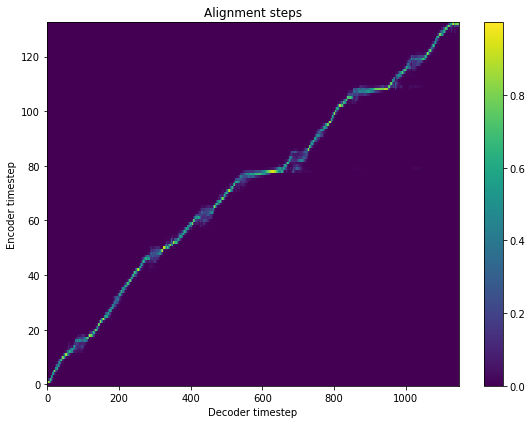

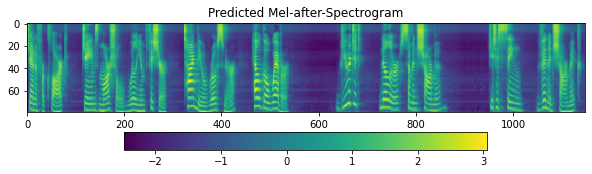

In [ ]:
mels, alignment_history, audios = do_synthesis(input_text, tacotron2, melgan_stft, "TACOTRON", "MELGAN-STFT")
visualize_attention(alignment_history[0])
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

### (c) Tacotron2 + MB-MELGAN

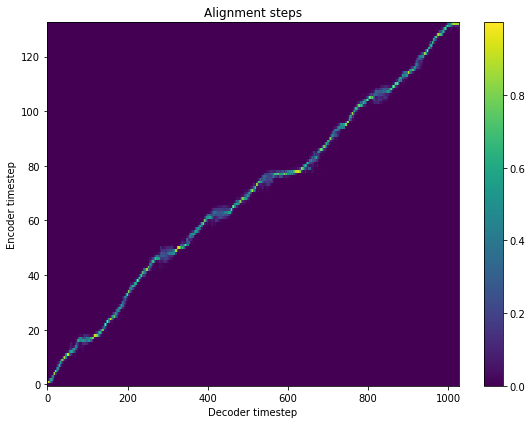

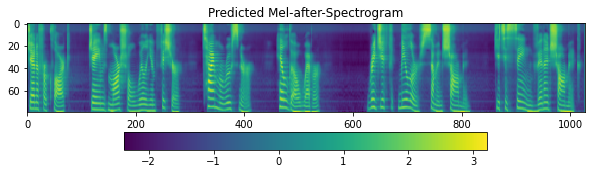

In [ ]:
mels, alignment_history, audios = do_synthesis(input_text, tacotron2, mb_melgan, "TACOTRON", "MB-MELGAN")
visualize_attention(alignment_history[0])
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

### (d) FastSpeech + MB-MELGAN

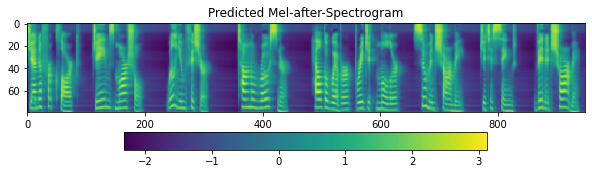

In [ ]:
mels, audios = do_synthesis(input_text, fastspeech, mb_melgan, "FASTSPEECH", "MB-MELGAN")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

### (e) FastSpeech + MELGAN-STFT

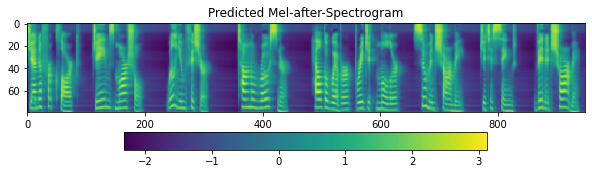

In [ ]:
mels, audios = do_synthesis(input_text, fastspeech, melgan_stft, "FASTSPEECH", "MELGAN-STFT")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

### (f) FastSpeech + MELGAN

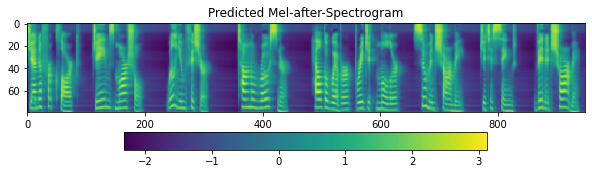

In [ ]:
mels, audios = do_synthesis(input_text, fastspeech, melgan, "FASTSPEECH", "MELGAN")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

### (g) FastSpeech2 + MB-MELGAN

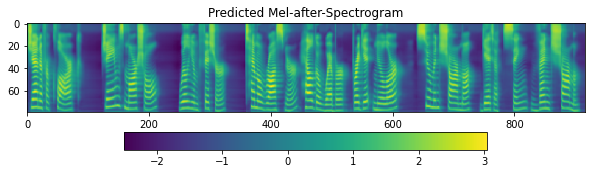

In [ ]:
mels, audios = do_synthesis(input_text, fastspeech2, mb_melgan, "FASTSPEECH2", "MB-MELGAN")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

FastSpeech2 + MELGAN-STFT

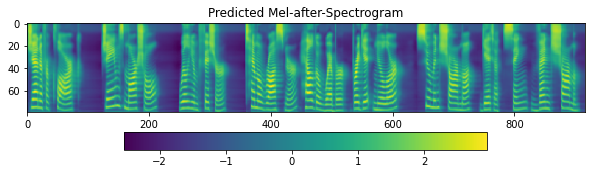

In [ ]:
mels, audios = do_synthesis(input_text, fastspeech2, melgan_stft, "FASTSPEECH2", "MELGAN-STFT")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

### (i) FastSpeech2 + MELGAN

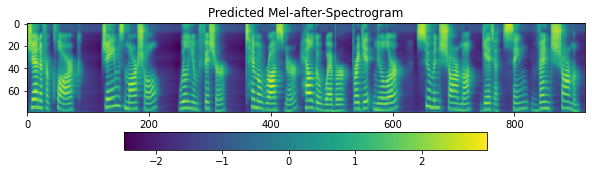

In [ ]:
mels, audios = do_synthesis(input_text, fastspeech2, melgan, "FASTSPEECH2", "MELGAN")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)